In [1]:
# Set annotation to annot_ce10
%run ~/relmapping/annot/notebooks/__init__.ipynb
annot = 'annot_ce10'
def vp(fp): return os.path.join(config[annot]['loc_metrics'], fp)

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [2]:
# Load long cap jump & exon data
df_atac = pd.read_csv(config[annot]['fp_sites_tsv'], sep='\t')
df_atac.head()

,chrom,start,end,atac_wt_emb_height,atac_wt_l1_height,atac_wt_l2_height,atac_wt_l3_height,atac_wt_l4_height,atac_wt_ya_height,atac_glp1_d1_height,atac_glp1_d2_height,atac_glp1_d6_height,atac_glp1_d9_height,atac_glp1_d13_height,atac_source
0,chrI,1900,2051,1.487219,1.436852,1.234831,1.476625,1.180041,3.028015,0.984149,0.912876,1.155934,1.187989,1.631096,atac_wt_se
1,chrI,3826,3977,67.202148,58.451061,74.416000,133.738358,179.794342,211.372787,88.025909,69.674324,68.506355,64.593590,55.761173,atac_wt_pe
2,chrI,4276,4427,1.581892,2.656172,2.186598,3.502825,5.871352,7.771934,1.802739,1.327403,1.547550,2.069787,1.812409,atac_wt_se
3,chrI,11272,11423,2.606371,4.443353,9.830266,10.700469,11.683004,13.928377,20.864365,16.739265,17.585819,15.858321,17.166847,atac_wt_pe
4,chrI,13070,13221,5.557951,3.608833,3.977978,3.398183,2.689872,2.953438,2.047788,2.084701,1.994170,2.586042,3.195713,atac_wt_pe


In [5]:
#df_lcap = pd.read_csv('annot/S2_regulatory_annotation/_lcap_jump/lcap_summary.tsv' % locals(), sep='\t')
df_lcap_fwd = pd.read_csv('annot/S2_regulatory_annotation/metrics/lcap_all_fwd.tsv', sep='\t')
df_lcap_rev = pd.read_csv('annot/S2_regulatory_annotation/metrics/lcap_all_rev.tsv', sep='\t')
df_lcap = pd.concat([df_lcap_fwd, df_lcap_rev], axis=1)
df_lcap.head()

,lcap_wt_emb_fwd_ucount_rep1,lcap_wt_emb_fwd_ucount_rep2,lcap_wt_emb_fwd_dcount_rep1,lcap_wt_emb_fwd_dcount_rep2,lcap_wt_emb_fwd_baseMean,lcap_wt_emb_fwd_log2FoldChange,lcap_wt_emb_fwd_lfcSE,lcap_wt_emb_fwd_stat,lcap_wt_emb_fwd_pvalue,lcap_wt_emb_fwd_padj,...,lcap_glp1_d13_rev_baseMean,lcap_glp1_d13_rev_log2FoldChange,lcap_glp1_d13_rev_lfcSE,lcap_glp1_d13_rev_stat,lcap_glp1_d13_rev_pvalue,lcap_glp1_d13_rev_padj,lcap_glp1_d13_rev_passed_jump,lcap_glp1_d13_rev_passed_incr,lcap_glp1_d13_rev_passed,lcap_glp1_d13_rev_summary
0,0,0,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,...,3.178684,-0.744335,1.818434,0.000000,6.588504e-01,0.960937,False,False,False,False / -0.74 / 0.961
1,6,0,1,1,1.897446,-1.225588,2.121204,0.000000,0.718293,1.000000,...,79.875590,9.320055,1.876127,4.967710,3.387408e-07,0.000008,True,True,True,True / 9.32 / 7.63e-06
2,1,1,0,0,0.481964,-2.557159,2.857203,0.000000,0.814603,NaN,...,0.935771,0.961622,2.531971,0.379792,3.520500e-01,NaN,False,False,False,False / 0.96 / nan
3,5,0,10,3,4.368121,1.331422,1.613477,0.825188,0.204632,0.515832,...,1.818028,4.155157,2.536240,1.638314,5.067809e-02,NaN,False,True,True,True / 4.16 / nan
4,10,8,6,6,7.353624,-0.488411,1.176110,0.000000,0.661030,1.000000,...,0.939379,0.966986,2.530644,0.382111,3.511897e-01,NaN,False,False,False,False / 0.97 / nan


In [6]:
# (Setup stranded structs)
df_prom_fwd = df_atac[['chrom', 'start', 'end']].copy()
df_prom_rev = df_atac[['chrom', 'start', 'end']].copy()
df_prom_fwd['strand'] = '+'
df_prom_rev['strand'] = '-'

In [7]:
# df_exon1 / df_exon2: first/other exons, coordinates fixed to represent 5' ends
#NAMES_EXON = ('chrom', 'start', 'end', 'transcript_id', 'score', 'strand', 'gene_id', 'gene_biotype', 'display_id')
l_adj_ = [
    'chrom', 'start', 'end', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'Name', 
    'exon_start', 'exon_end', 'utr_start', 'utr_end', 'aoe_end', 'aoe_start', 'gene_biotype', 
    'exon_id', 'gene_id', 'locus_id', 'init_cutoff_pos', 
]

#df_pass1_exon1_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_fwd.bed')
#df_pass1_exon1_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_rev.bed')
df_pass1_exon1_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_fwd_utradj.bed')[l_adj_]
df_pass1_exon1_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_rev_utradj.bed')[l_adj_]
df_pass1_exon2_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon2_fwd.bed')
df_pass1_exon2_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon2_rev.bed')
df_pass2_exon1_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass2_exon1_fwd.bed')
df_pass2_exon1_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass2_exon1_rev.bed')

# Set 1st exon matching area to TSS + 250bp
df_pass1_exon1_fwd['end'] = df_pass1_exon1_fwd['start'] + 1 + 250
df_pass1_exon1_rev['start'] = df_pass1_exon1_rev['end'] - 1 - 250

print(len(df_pass1_exon1_fwd), len(df_pass1_exon1_rev),
      len(df_pass1_exon2_fwd), len(df_pass1_exon2_rev),
      len(df_pass2_exon1_fwd), len(df_pass2_exon1_rev),
)

/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:400: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


17922 17074 105494 99143 808 753


In [8]:
# Match hypersensitive sites to closest first/other exon
def df_closest(df_a, df_b, b_prefix, **kwargs):
    df_a_sort = df_a
    df_b_sort = df_b.sort_values(list(df_b.columns[:3]))
    fn_ = BedTool.from_dataframe(df_a).closest(BedTool.from_dataframe(df_b_sort).fn, **kwargs).fn
    names_ = list(itertools.chain(df_a.columns.values,
        ['%s_%s' % (b_prefix, col) for col in df_b.columns.values],
        ['%s_distance' % (b_prefix)]
    ))
    df_ = pd.read_csv(fn_, names=names_, sep='\t')
    return df_[names_[len(df_a.columns):]]

l_atac_peak_pos = df_atac[['start', 'end']].mean(axis=1).map(int)

# Closest exon1 -- protein_coding & pseudogene
df_ = pd.concat([df_atac['chrom'], l_atac_peak_pos, l_atac_peak_pos + 1], axis=1).copy()
df_pass1_exon1_fwd_out_ = df_closest(df_, df_pass1_exon1_fwd, 'pass1_exon1', D='ref', t='first', iu=True)
df_pass1_exon1_rev_out_ = df_closest(df_, df_pass1_exon1_rev, 'pass1_exon1', D='ref', t='last', id=True)

# Closest exon2 can be both upstream or downstream
df_pass1_exon2_fwd_out_ = df_closest(df_, df_pass1_exon2_fwd, 'pass1_exon2', D='ref', t='first')
df_pass1_exon2_rev_out_ = df_closest(df_, df_pass1_exon2_rev, 'pass1_exon2', D='ref', t='last')

# Closest exon2 can be both upstream or downstream (downstream only)
df_pass1_exon2_downstream_fwd_out_ = df_closest(df_, df_pass1_exon2_fwd, 'pass1_exon2_downstream', D='ref', t='first', iu=True)
df_pass1_exon2_downstream_rev_out_ = df_closest(df_, df_pass1_exon2_rev, 'pass1_exon2_downstream', D='ref', t='last', id=True)

# Closes pass2/exon1 -- tRNA, snoRNA, rRNA, miRNA, etc
df_pass2_exon1_fwd_out_ = df_closest(df_, df_pass2_exon1_fwd, 'pass2_exon1', D='ref', t='first', iu=True)
df_pass2_exon1_rev_out_ = df_closest(df_, df_pass2_exon1_rev, 'pass2_exon1', D='ref', t='last', id=True)

df_exon_fwd = pd.concat([df_pass1_exon1_fwd_out_, df_pass1_exon2_fwd_out_, df_pass1_exon2_downstream_fwd_out_, df_pass2_exon1_fwd_out_], axis=1)
df_exon_rev = pd.concat([df_pass1_exon1_rev_out_, df_pass1_exon2_rev_out_, df_pass1_exon2_downstream_rev_out_, df_pass2_exon1_rev_out_], axis=1)

df_exon_fwd.to_csv(vp('closest_exon_fwd.tsv'), header=True, index=False, sep='\t')
df_exon_rev.to_csv(vp('closest_exon_rev.tsv'), header=True, index=False, sep='\t')

l_ = ['pass1_exon1_gene_id', 'pass1_exon1_locus_id', 'pass1_exon1_distance']
write_gffbed(vp('closest_pass1_exon1_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['pass1_exon1_Name'],
    strand = '+',
    attr = df_exon_fwd[l_], 
)
write_gffbed(vp('closest_pass1_exon1_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['pass1_exon1_Name'],
    strand = '-',
    attr = df_exon_rev[l_], 
)

l_ = ['pass1_exon2_gene_id', 'pass1_exon2_locus_id', 'pass1_exon2_distance']
write_gffbed(vp('closest_pass1_exon2_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['pass1_exon2_Name'],
    strand = '+',
    attr = df_exon_fwd[l_], 
)
write_gffbed(vp('closest_pass1_exon2_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['pass1_exon2_Name'],
    strand = '-',
    attr = df_exon_rev[l_], 
)

l_ = ['pass1_exon2_downstream_gene_id', 'pass1_exon2_downstream_locus_id', 'pass1_exon2_downstream_distance']
write_gffbed(vp('closest_pass1_exon2_downstream_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['pass1_exon2_downstream_Name'],
    strand = '+',
    attr = df_exon_fwd[l_], 
)
write_gffbed(vp('closest_pass1_exon2_downstream_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['pass1_exon2_downstream_Name'],
    strand = '-',
    attr = df_exon_rev[l_], 
)

l_ = ['pass2_exon1_gene_id', 'pass2_exon1_locus_id', 'pass2_exon1_distance']
write_gffbed(vp('closest_pass2_exon1_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['pass2_exon1_Name'],
    strand = '+',
    attr = df_exon_fwd[l_], 
)
write_gffbed(vp('closest_pass2_exon1_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['pass2_exon1_Name'],
    strand = '-',
    attr = df_exon_rev[l_], 
)

In [9]:
# maximum gap between hypersensitive site and downstream first exons
def maxgap(a): return max(len(list(g)) if (k == 0) or (k != k) else 0 for k,g in itertools.groupby(a))

def nanmaxgap(a): return maxgap([e if e == e else 0 for e in a])

def maxgap_fwd_(fp_inp, chroms, atac_modes, exon1_starts, flank_len=250):
    l = []
    fh = pyBigWig.open(fp_inp)
    for (chrom, atac_mode, exon1_start) in itertools.islice(zip(chroms, atac_modes, exon1_starts), None):
        # Interval between atac-mode (+flank), and 5'-end of closest downstream exonl clipped by chromosome ends
        start_ = max(atac_mode + flank_len, 0)
        end_ = min(exon1_start + 1, fh.chroms(chrom))
        if start_ < end_:
            l.append(nanmaxgap(np.array(fh.values(chrom, int(start_), int(end_)))))
        else:
            l.append(-1)
    fh.close()
    return l

def maxgap_rev_(fp_inp, chroms, atac_modes, exon1_ends, flank_len=250):
    l = []
    fh = pyBigWig.open(fp_inp)
    for (chrom, atac_mode, exon1_end) in itertools.islice(zip(chroms, atac_modes, exon1_ends), None):
        # Interval between atac-mode (+flank), and 5'-end of closest downstream exonl clipped by chromosome ends
        start_ = max(exon1_end - 1, 0)
        end_ = min(atac_mode - flank_len + 1, fh.chroms(chrom))
        if start_ < end_:
            l.append(nanmaxgap(np.array(fh.values(chrom, int(start_), int(end_)))))
        else:
            l.append(-1)
    fh.close()
    return l

def maxgap_fwd(stage):
    step = 'trim20.bwa_pe.rm_unmapped_pe.rm_chrM.rm_rRNA_broad.rm_blacklist.rm_q10.filled_fwd.mean_by_stage'
    fp_fwd = pf('lcap808_%s' % (stage,), step, '.bw', 'lcap808')
    l_maxgap = maxgap_fwd_(fp_fwd, df_atac['chrom'], l_atac_peak_pos, df_exon_fwd['pass1_exon1_start'])
    return pd.DataFrame({'maxgap_%s_fwd' % (stage,): l_maxgap})

def maxgap_rev(stage):
    step = 'trim20.bwa_pe.rm_unmapped_pe.rm_chrM.rm_rRNA_broad.rm_blacklist.rm_q10.filled_rev.mean_by_stage'
    fp_rev = pf('lcap808_%s' % (stage,), step, '.bw', 'lcap808')
    l_maxgap = maxgap_rev_(fp_rev, df_atac['chrom'], l_atac_peak_pos, df_exon_rev['pass1_exon1_end'])
    return pd.DataFrame({'maxgap_%s_rev' % (stage,): l_maxgap})

df_maxgap_fwd = pd.concat(pmap(maxgap_fwd, config['stages'], n_jobs=15), axis=1)
df_maxgap_rev = pd.concat(pmap(maxgap_rev, config['stages'], n_jobs=15), axis=1)

# Visualise maxgap as .bed-files
def itemRgb_(maxgap_):
    if maxgap_ == 0:
        return RED
    else:
        return BLUE

write_gffbed('annot/S2_regulatory_annotation/metrics/maxgap_fwd.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_maxgap_fwd.min(axis=1),
    strand = '+',
    attr = df_maxgap_fwd,
    itemRgb = map(itemRgb_, df_maxgap_fwd.min(axis=1)),
)

write_gffbed('annot/S2_regulatory_annotation/metrics/maxgap_rev.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_maxgap_rev.min(axis=1),
    strand = '-',
    attr = df_maxgap_rev,
    itemRgb = map(itemRgb_, df_maxgap_rev.min(axis=1)),
)

!wc -l annot/S2_regulatory_annotation/maxgap_rev.bed
!wc -l annot/S2_regulatory_annotation/maxgap_fwd.bed

[Parallel(n_jobs=15)]: Done  11 out of  11 | elapsed:  1.8min finished
[Parallel(n_jobs=15)]: Done  11 out of  11 | elapsed:  1.8min finished


wc: annot/S2_regulatory_annotation/maxgap_rev.bed: No such file or directory
wc: annot/S2_regulatory_annotation/maxgap_fwd.bed: No such file or directory


In [10]:
# df_pass1_gene_%strand <- WS260_ce10 gene coordinates, excluding 250bp downstream of TSS
df_ = pd.concat([
    yp.read_wbgtf('WS260_ce10/WS260_ce10.genes.pseudogene.gtf.gz', parse_attr=True),
    yp.read_wbgtf('WS260_ce10/WS260_ce10.genes.protein_coding.gtf.gz', parse_attr=True),
], axis=0)
df_['start'] = df_['start'] - 1 # coordinates gtf-to-bed

df_pass1_gene_fwd = df_.query('strand == "+"').reset_index(drop=True)[['chrom', 'start', 'end', 'gene_id']]
df_pass1_gene_rev = df_.query('strand == "-"').reset_index(drop=True)[['chrom', 'start', 'end', 'gene_id']]

print(len(df_pass1_gene_fwd), len(df_pass1_gene_rev), 'fwd/rev genes')

# do not mask 250bp downstream of TSS
df_pass1_gene_fwd['start'] = df_pass1_gene_fwd['start'] + 250
df_pass1_gene_rev['end'] = df_pass1_gene_rev['end'] - 250

df_pass1_gene_fwd = df_pass1_gene_fwd.query('start < end')
df_pass1_gene_rev = df_pass1_gene_rev.query('start < end')
print(len(df_pass1_gene_fwd), len(df_pass1_gene_rev), 'fwd/rev genes longer than 250bp kept')

/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:400: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


11073 10928 fwd/rev genes
10829 10668 fwd/rev genes longer than 250bp kept


In [11]:
# df_pass1_gpos_%strand[gene_chrom/start/end] <- closest gene; if overlaps multiple genes, choose one with the more distal TSS
def df_pos():
    l_atac_peak_pos = df_atac[['start', 'end']].mean(axis=1).map(int)
    df_ = pd.concat([df_atac['chrom'], l_atac_peak_pos, l_atac_peak_pos + 1], axis=1).copy()
    df_.columns = ['chrom', 'start', 'end']
    return df_

def df_closest_(df_a, df_b, b_prefix, **kwargs):
    df_a_sort = df_a
    df_b_sort = df_b.sort_values(list(df_b.columns[:3]))
    fn_ = BedTool.from_dataframe(df_a).closest(BedTool.from_dataframe(df_b_sort).fn, **kwargs).fn
    names_ = list(itertools.chain(df_a.columns.values,
        ['%s_%s' % (b_prefix, col) for col in df_b.columns.values],
    ))
    df_ = pd.read_csv(fn_, sep='\t', names=names_)
    return df_#[names_[len(df_a.columns):]]

df_pass1_gpos_fwd_ = df_closest_(df_pos(), df_pass1_gene_fwd, 'pass1_gpos', t='all')
df_pass1_gpos_rev_ = df_closest_(df_pos(), df_pass1_gene_rev, 'pass1_gpos', t='all')
print(len(df_pass1_gpos_fwd_), len(df_pass1_gpos_rev_), 'fwd/rev gene body hits')

42265 42309 fwd/rev gene body hits


In [12]:
# df_pass1_gpos_%strand[is_nearly_intergenic] <- site is outside of gene bodies, or up to 250bp from the TSS
df_pass1_gpos_fwd_['is_nearly_intergenic'] = ~((df_pass1_gpos_fwd_['pass1_gpos_start'] <= df_pass1_gpos_fwd_['start'])\
                                           & (df_pass1_gpos_fwd_['end'] <= df_pass1_gpos_fwd_['pass1_gpos_end']))
df_pass1_gpos_rev_['is_nearly_intergenic'] = ~((df_pass1_gpos_rev_['pass1_gpos_start'] <= df_pass1_gpos_rev_['start'])\
                                           & (df_pass1_gpos_rev_['end'] <= df_pass1_gpos_rev_['pass1_gpos_end']))

l_ = 'is_nearly_intergenic'
d_ = {'is_nearly_intergenic': np.any}
df_exon_fwd[l_] = df_pass1_gpos_fwd_.groupby(['chrom', 'start', 'end']).agg(d_).reset_index()[l_]
df_exon_rev[l_] = df_pass1_gpos_rev_.groupby(['chrom', 'start', 'end']).agg(d_).reset_index()[l_]
print(len(df_exon_fwd), len(df_exon_rev))
print(len(df_exon_fwd.query('is_nearly_intergenic')))
print(len(df_exon_rev.query('is_nearly_intergenic')))

# Visualise maxgap as .bed-files
def itemRgb_(is_nearly_intergenic_):
    if is_nearly_intergenic_:
        return yp.ORANGE
    else:
        return yp.BLUE

write_gffbed(vp('is_nearly_intergenic_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    #name = df_maxgap_fwd.min(axis=1),
    strand = '+',
    #attr = df_pass1_gpos_fwd_,
    itemRgb = map(itemRgb_, df_exon_fwd['is_nearly_intergenic']),
)

write_gffbed(vp('is_nearly_intergenic_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    #name = df_maxgap_rev.min(axis=1),
    strand = '-',
    #attr = df_maxgap_rev,
    itemRgb = map(itemRgb_, df_exon_rev['is_nearly_intergenic']),
)

42245 42245
33548
33808


In [16]:
# df_prom_%strand[annot_detailed_%stage] <- stage-specific detailed annotation, excluding lowconf
d_detailed_annot = collections.OrderedDict([
    ('coding_promoter_jump_scap', 'coding_promoter'),
    ('coding_promoter_incr_scap', 'coding_promoter'),
    ('coding_promoter_jump_incr', 'coding_promoter'),
    ('coding_promoter_lowconf', 'coding_promoter'),
    ('pseudogene_promoter_jump_scap', 'pseudogene_promoter'),
    ('pseudogene_promoter_incr_scap', 'pseudogene_promoter'),
    ('pseudogene_promoter_jump_incr', 'pseudogene_promoter'),
    ('pseudogene_promoter_lowconf', 'pseudogene_promoter'),
    ('non-coding_RNA', 'non-coding_RNA'),
    ('unknown_promoter_jump_scap', 'unknown_promoter'),
    #('unknown_promoter_jump_incr', 'unknown_promoter'),
    ('transcription_initiation', 'transcription_initiation'),
    ('no_transcription', 'no_transcription'),
])

d_annot_strand_legend = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('non-coding_RNA', yp.BLACK),
    ('unknown_promoter', yp.YELLOW),
    ('transcription_initiation', yp.GREEN),
    ('no_transcription', yp.BLUE),
])

d_annot_legend = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('non-coding_RNA', yp.BLACK),
    ('unknown_promoter', yp.YELLOW),
    ('putative_enhancer', yp.GREEN),
    ('other_element', yp.BLUE),
])

def prom_summary_stage(l_chrom, l_start, l_end, l_jump, l_incr, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype, l_is_exon1_first, l_is_nearly_intergenic):
    for (chrom, start, end, jump, incr, maxgap, exon1_dist, exon2_dist, pass2_exon1_dist, scap_mode_count, scap_diff, gene_biotype, is_exon1_first, is_nearly_intergenic) in \
            zip(l_chrom, l_start, l_end, l_jump, l_incr, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype, l_is_exon1_first, l_is_nearly_intergenic):

        near_exon1 = abs(exon1_dist) < 250
        near_exon2 = abs(exon2_dist) < 250
        near_pass2_exon1 = abs(pass2_exon1_dist) < 250
        nearly_upstream_of_tss = exon1_dist > -250
        has_scap = scap_mode_count >= 2
        n_txn_evidence = int(incr) + int(jump) + int(has_scap)
        txn_2of3 = n_txn_evidence >= 2

        #is_gene_biotype = (gene_biotype == 'protein_coding') | (gene_biotype == 'pseudogene')
        #v = False
        #if chrom == "chrI" and start == 183421 and end == 183568: v = True
        #if (chrom == "chrX") and (start == 1125552) and (end == 1125703):
        #    v = True
        #    print(jump, maxgap <= 0, scap_diff >= 0, has_scap)
        #if start == 11829601-1: print(incr, jump, has_scap, n_txn_evidence)

        if (near_exon1 or not(near_exon2)) and nearly_upstream_of_tss and is_exon1_first \
           and (maxgap <= 0) and (scap_diff >= 0) and txn_2of3:
            #if v: print('coding_promoter')
            if jump and has_scap:
                yield 'coding_promoter_jump_scap' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter_jump_scap'
            elif incr and has_scap:
                yield 'coding_promoter_incr_scap' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter_incr_scap'
            elif jump and incr:
                yield 'coding_promoter_jump_incr' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter_jump_incr'
            else:
                assert False
        elif near_pass2_exon1:
            #if v: print('non-coding_RNA')
            yield 'non-coding_RNA'
        elif ((jump and has_scap)) and is_nearly_intergenic and not(near_exon1 or near_exon2):
            # or (jump and incr)
            #if v: print('unknown_promoter')
            if jump and has_scap:
                yield 'unknown_promoter_jump_scap'
            #elif jump and incr:
            #    yield 'unknown_promoter_jump_incr'
            else:
                assert False
        elif has_scap:
            #if v: print('transcription_initiation')
            yield 'transcription_initiation'
        else:
            #if v: print('no_transcription')
            yield 'no_transcription'

for stage in itertools.islice(config['stages'], None):
    print(stage, 'fwd')
    df_prom_fwd['annot_detailed_%s' % (stage,)] = list(prom_summary_stage(
        l_chrom=df_atac['chrom'], l_start=df_atac['start'], l_end=df_atac['end'],
        l_jump=df_lcap['lcap_%s_fwd_passed_jump' % (stage,)],
        l_incr=df_lcap['lcap_%s_fwd_passed_incr' % (stage,)],
        l_maxgap=df_maxgap_fwd['maxgap_%s_fwd' % (stage,)],
        #l_exon1_dist=df_exon_fwd['pass1_exon1_distance'],
        l_exon1_dist=df_exon_fwd['pass1_exon1_start'] - l_atac_peak_pos,
        l_exon2_dist=df_exon_fwd['pass1_exon2_start'] - l_atac_peak_pos,
        l_pass2_exon2_dist=df_exon_fwd['pass2_exon1_start'] - l_atac_peak_pos,
        l_has_scap=df_prom_fwd['scap_mode_count'],
        l_scap_diff=pd.to_numeric(df_exon_fwd['pass1_exon1_init_cutoff_pos'], errors='coerce') - df_prom_fwd['scap_mode'],
        l_gene_biotype=df_exon_fwd['pass1_exon1_gene_biotype'],
        l_is_exon1_first=df_exon_fwd['pass1_exon1_distance'] <= df_exon_fwd['pass1_exon2_downstream_distance'],
        l_is_nearly_intergenic=df_exon_fwd['is_nearly_intergenic'],
    ))
    print(stage, 'rev')
    df_prom_rev['annot_detailed_%s' % (stage,)] = list(prom_summary_stage(
        l_chrom=df_atac['chrom'], l_start=df_atac['start'], l_end=df_atac['end'],
        l_jump=df_lcap['lcap_%s_rev_passed_jump' % (stage,)],
        l_incr=df_lcap['lcap_%s_rev_passed_incr' % (stage,)],
        l_maxgap=df_maxgap_rev['maxgap_%s_rev' % (stage,)],
        #l_exon1_dist=-df_exon_rev['pass1_exon1_distance'], 
        l_exon1_dist=l_atac_peak_pos - (df_exon_rev['pass1_exon1_end'] - 1),
        l_exon2_dist=l_atac_peak_pos - (df_exon_rev['pass1_exon2_end'] - 1),
        l_pass2_exon2_dist=l_atac_peak_pos - (df_exon_rev['pass2_exon1_end'] - 1),
        l_has_scap=df_prom_rev['scap_mode_count'],
        l_scap_diff=df_prom_rev['scap_mode'] - pd.to_numeric(df_exon_rev['pass1_exon1_init_cutoff_pos'], errors='coerce'),
        l_gene_biotype=df_exon_rev['pass1_exon1_gene_biotype'],
        l_is_exon1_first=df_exon_rev['pass1_exon2_downstream_distance'] <= df_exon_rev['pass1_exon1_distance'],
        l_is_nearly_intergenic=df_exon_rev['is_nearly_intergenic'],
    ))

wt_emb fwd
wt_emb rev
wt_l1 fwd
wt_l1 rev
wt_l2 fwd
wt_l2 rev
wt_l3 fwd
wt_l3 rev
wt_l4 fwd
wt_l4 rev
wt_ya fwd
wt_ya rev
glp1_d1 fwd
glp1_d1 rev
glp1_d2 fwd
glp1_d2 rev
glp1_d6 fwd
glp1_d6 rev
glp1_d9 fwd
glp1_d9 rev
glp1_d13 fwd
glp1_d13 rev


In [17]:
# df_prom_%strand[annot_detailed_all] <- stage-aggregated detailed annotation, excluding lowconf
def annot_detailed_summary_(l_annot):
    l_ranking = list(d_detailed_annot.keys())
    l_annot_i = [l_ranking.index(annot) for annot in l_annot]
    return l_ranking[min(l_annot_i)]

df_prom_fwd['annot_detailed_summary'] = list(map(lambda ir: annot_detailed_summary_(ir[1].tolist()),
    df_prom_fwd[['annot_detailed_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

df_prom_rev['annot_detailed_summary'] = list(map(lambda ir: annot_detailed_summary_(ir[1].tolist()),
    df_prom_rev[['annot_detailed_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

In [18]:
# Forward strand annotation summary table (excl. lowconf)
df_fwd_ = pd.concat([df_prom_fwd['annot_detailed_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_detailed_annot.keys()]
df_fwd_.columns = config['stages'] + ['summary']
#df_fwd_.to_latex('%(dm_step)s_fig/prom_summary_fwd.latex' % locals())
df_fwd_.fillna(0, downcast='infer')

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter_jump_scap,3228,3612,4238,3502,3598,3163,2472,2109,2459,2413,2444,6042
coding_promoter_incr_scap,389,281,292,438,336,450,402,318,482,307,518,784
coding_promoter_jump_incr,52,73,94,73,101,104,74,97,71,94,78,368
coding_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,0
pseudogene_promoter_jump_scap,49,43,43,32,41,49,24,13,25,19,21,90
pseudogene_promoter_incr_scap,11,8,10,13,9,3,9,4,9,10,11,20
pseudogene_promoter_jump_incr,8,8,11,7,11,8,6,1,5,4,2,23
pseudogene_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,0
non-coding_RNA,498,492,487,493,496,493,499,501,496,494,492,469
unknown_promoter_jump_scap,468,600,798,406,328,263,189,150,214,285,362,1521


In [19]:
# Reverse strand annotation summary table (excl. lowconf)
df_rev_ = pd.concat([df_prom_rev['annot_detailed_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_detailed_annot.keys()]
df_rev_.columns = config['stages'] + ['summary']
#df_rev_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
df_rev_.fillna(0, downcast='infer')

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter_jump_scap,3292,3615,4240,3716,3592,3186,2469,2155,2457,2366,2553,6027
coding_promoter_incr_scap,339,284,293,354,351,434,379,342,471,365,455,701
coding_promoter_jump_incr,72,75,88,97,114,112,81,89,77,92,95,404
coding_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,0
pseudogene_promoter_jump_scap,55,54,62,52,48,46,22,11,27,23,26,107
pseudogene_promoter_incr_scap,13,11,6,11,10,15,6,9,10,6,7,19
pseudogene_promoter_jump_incr,7,8,11,8,11,11,5,3,5,6,6,29
pseudogene_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,0
non-coding_RNA,498,498,494,498,500,495,505,507,505,499,502,482
unknown_promoter_jump_scap,443,617,862,493,366,245,179,172,208,270,378,1611


In [20]:
# df_lowconf_%strand[annot_lowconf_raw_%stage] <- candidate "raw" low-confidence annotation (with aggregating)
def lowconf_raw_stage(l_chrom, l_start, l_end, l_jump, l_incr, l_log2FoldChange, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype, l_is_exon1_first, l_is_nearly_intergenic):
    for (chrom, start, end, jump, incr, log2FoldChange, maxgap, exon1_dist, exon2_dist, pass2_exon1_dist, scap_mode_count, scap_diff, gene_biotype, is_exon1_first, is_nearly_intergenic) in \
            zip(l_chrom, l_start, l_end, l_jump, l_incr, l_log2FoldChange, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype, l_is_exon1_first, l_is_nearly_intergenic):

        near_exon1 = abs(exon1_dist) < 250
        near_exon2 = abs(exon2_dist) < 250
        near_pass2_exon1 = abs(pass2_exon1_dist) < 250
        nearly_upstream_of_tss = exon1_dist > -250
        has_scap = scap_mode_count >= 2
        has_txn_evidence = (log2FoldChange > 1) #incr or (log2FoldChange > 1 and (has_scap))

        v = False
        #if chrom == "chrI" and start == 183421 and end == 183568: v = True
        if (near_exon1 or not(near_exon2)) and nearly_upstream_of_tss and is_exon1_first and\
            is_nearly_intergenic and (not (maxgap > 0)) and has_txn_evidence and (scap_diff >= 0): #-50
            #if pass1_exon1_locus_id == "F59F4.3":
            #    print(chrom, start, end)
            yield 'coding_promoter_lowconf' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter_lowconf'
        else:
            yield 'no_lowconf_annotation'

df_lowconf_fwd = df_atac[['chrom', 'start', 'end']].copy()
df_lowconf_rev = df_atac[['chrom', 'start', 'end']].copy()
df_lowconf_fwd['strand'] = '+'
df_lowconf_rev['strand'] = '-'

for stage in itertools.islice(config['stages'], None):
    print(stage, 'fwd')
    df_lowconf_fwd['annot_lowconf_raw_%s' % (stage,)] = list(lowconf_raw_stage(
        l_chrom=df_atac['chrom'], l_start=df_atac['start'], l_end=df_atac['end'],
        l_jump=df_lcap['lcap_%s_fwd_passed_jump' % (stage,)],
        l_incr=df_lcap['lcap_%s_fwd_passed_incr' % (stage,)],
        l_log2FoldChange=df_lcap['lcap_%s_fwd_log2FoldChange' % (stage,)],
        l_maxgap=df_maxgap_fwd['maxgap_%s_fwd' % (stage,)],
        #l_exon1_dist=df_exon_fwd['pass1_exon1_distance'],
        l_exon1_dist=df_exon_fwd['pass1_exon1_start'] - l_atac_peak_pos,
        l_exon2_dist=df_exon_fwd['pass1_exon2_start'] - l_atac_peak_pos,
        l_pass2_exon2_dist=df_exon_fwd['pass2_exon1_start'] - l_atac_peak_pos,
        l_has_scap=df_prom_fwd['scap_mode_count'],
        l_scap_diff=pd.to_numeric(df_exon_fwd['pass1_exon1_init_cutoff_pos'], errors='coerce') - df_prom_fwd['scap_mode'],
        l_gene_biotype=df_exon_fwd['pass1_exon1_gene_biotype'],
        #l_pass1_exon1_locus_id=df_exon_fwd['pass1_exon1_locus_id'],
        l_is_exon1_first=df_exon_fwd['pass1_exon1_distance'] <= df_exon_fwd['pass1_exon2_downstream_distance'],
        l_is_nearly_intergenic=df_exon_fwd['is_nearly_intergenic'],
    ))
    print(stage, 'rev')
    df_lowconf_rev['annot_lowconf_raw_%s' % (stage,)] = list(lowconf_raw_stage(
        l_chrom=df_atac['chrom'], l_start=df_atac['start'], l_end=df_atac['end'],
        l_jump=df_lcap['lcap_%s_rev_passed_jump' % (stage,)],
        l_incr=df_lcap['lcap_%s_rev_passed_incr' % (stage,)],
        l_log2FoldChange=df_lcap['lcap_%s_rev_log2FoldChange' % (stage,)],
        l_maxgap=df_maxgap_rev['maxgap_%s_rev' % (stage,)],
        #l_exon1_dist=-df_exon_rev['pass1_exon1_distance'], 
        l_exon1_dist=l_atac_peak_pos - (df_exon_rev['pass1_exon1_end'] - 1),
        l_exon2_dist=l_atac_peak_pos - (df_exon_rev['pass1_exon2_end'] - 1),
        l_pass2_exon2_dist=l_atac_peak_pos - (df_exon_rev['pass2_exon1_end'] - 1),
        l_has_scap=df_prom_rev['scap_mode_count'],
        l_scap_diff=df_prom_rev['scap_mode'] - pd.to_numeric(df_exon_rev['pass1_exon1_init_cutoff_pos'], errors='coerce'),
        l_gene_biotype=df_exon_rev['pass1_exon1_gene_biotype'],
        #l_pass1_exon1_locus_id=df_exon_rev['pass1_exon1_locus_id'],
        l_is_exon1_first=df_exon_rev['pass1_exon2_downstream_distance'] <= df_exon_rev['pass1_exon1_distance'],
        l_is_nearly_intergenic=df_exon_rev['is_nearly_intergenic'],
    ))

wt_emb fwd
wt_emb rev
wt_l1 fwd
wt_l1 rev
wt_l2 fwd
wt_l2 rev
wt_l3 fwd
wt_l3 rev
wt_l4 fwd
wt_l4 rev
wt_ya fwd
wt_ya rev
glp1_d1 fwd
glp1_d1 rev
glp1_d2 fwd
glp1_d2 rev
glp1_d6 fwd
glp1_d6 rev
glp1_d9 fwd
glp1_d9 rev
glp1_d13 fwd
glp1_d13 rev


In [21]:
# df_lowconf_%strand[annot_lowconf_raw_summary] <- candidate "raw" low-confidence annotation across stages
d_annot_lowconf_raw_legend = collections.OrderedDict([
    ('coding_promoter_lowconf', yp.RED),
    ('pseudogene_promoter_lowconf', yp.ORANGE),
    ('no_lowconf_annotation', yp.BLACK),
])

def annot_lowconf_raw_summary_(l_annot):
    l_ranking = list(d_annot_lowconf_raw_legend.keys())
    l_annot_i = [l_ranking.index(annot) for annot in l_annot]
    return l_ranking[min(l_annot_i)]

df_lowconf_fwd['annot_lowconf_raw_summary'] = list(map(lambda ir: annot_lowconf_raw_summary_(ir[1].tolist()),
    df_lowconf_fwd[['annot_lowconf_raw_%(stage)s' % locals() for stage in config['stages']]].iterrows()))
df_lowconf_rev['annot_lowconf_raw_summary'] = list(map(lambda ir: annot_lowconf_raw_summary_(ir[1].tolist()),
    df_lowconf_rev[['annot_lowconf_raw_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

In [22]:
# df_lowconf_%strand[lcap_log2FoldChange_max] <- max log2FoldChange over all candidates (lowconf_raw) by gene_id

# copy fields over in order to group by
df_lowconf_fwd['pass1_exon1_gene_id'] = df_exon_fwd['pass1_exon1_gene_id'] 
df_lowconf_rev['pass1_exon1_gene_id'] = df_exon_rev['pass1_exon1_gene_id']

q_ = "(annot_lowconf_raw_summary == 'coding_promoter_lowconf') | (annot_lowconf_raw_summary == 'pseudogene_promoter_lowconf')"
df_lowconf_fwd['lcap_log2FoldChange'] = df_lcap_fwd[['lcap_%s_fwd_log2FoldChange' % (s_,) for s_ in config['stages']]].max(axis=1)
df_lowconf_rev['lcap_log2FoldChange'] = df_lcap_rev[['lcap_%s_rev_log2FoldChange' % (s_,) for s_ in config['stages']]].max(axis=1)

df_lowconf_fwd['lcap_log2FoldChange_max'] = df_lowconf_fwd.query(q_)\
    .groupby('pass1_exon1_gene_id')['lcap_log2FoldChange'].transform(np.nanmax)
df_lowconf_rev['lcap_log2FoldChange_max'] = df_lowconf_rev.query(q_)\
    .groupby('pass1_exon1_gene_id')['lcap_log2FoldChange'].transform(np.nanmax)

In [23]:
# df_lowconf_%strand[annot_lowconf_summary] <- low-confidence annotations candidates (=only for "promoterless genes")
df_lowconf_fwd['annot_detailed_summary'] = df_prom_fwd['annot_detailed_summary']
df_lowconf_rev['annot_detailed_summary'] = df_prom_rev['annot_detailed_summary']

# list of gene_id without jump/incr promoters, but at least one candidate lowconf promoter
l1_ = ['coding_promoter_jump_scap', 'coding_promoter_incr_scap', 'coding_promoter_jump_incr',
    'pseudogene_promoter_jump_scap', 'pseudogene_promoter_incr_scap', 'pseudogene_promoter_jump_incr',
]
l2_ = ['coding_promoter_lowconf', 'pseudogene_promoter_lowconf']
l_prom_lowconf_fwd_gene_id = df_lowconf_fwd.groupby('pass1_exon1_gene_id').agg({
        'annot_detailed_summary': lambda a: len([a_i for a_i in a if a_i in l1_]),
        'annot_lowconf_raw_summary': lambda a: len([a_i for a_i in a if a_i in l2_]),
}).query('(annot_detailed_summary == 0) & (annot_lowconf_raw_summary > 0)').index.tolist()

l_prom_lowconf_rev_gene_id = df_lowconf_rev.groupby('pass1_exon1_gene_id').agg({
        'annot_detailed_summary': lambda a: len([a_i for a_i in a if a_i in l1_]),
        'annot_lowconf_raw_summary': lambda a: len([a_i for a_i in a if a_i in l2_]),
}).query('(annot_detailed_summary == 0) & (annot_lowconf_raw_summary > 0)').index.tolist()

l3_ = ["coding_promoter_lowconf", "pseudogene_promoter_lowconf"]
def annot_lowconf_fwd_summary(ir):
    (i, r) = (ir[0], ir[1])
    if (r.annot_lowconf_raw_summary in l3_) and (r.pass1_exon1_gene_id in l_prom_lowconf_fwd_gene_id) and (r.lcap_log2FoldChange_max == r.lcap_log2FoldChange):
        return r.annot_lowconf_raw_summary
    else:
        return '.'

def annot_lowconf_rev_summary(ir):
    (i, r) = (ir[0], ir[1])
    if (r.annot_lowconf_raw_summary in l3_) and (r.pass1_exon1_gene_id in l_prom_lowconf_rev_gene_id) and (r.lcap_log2FoldChange_max == r.lcap_log2FoldChange):
        return r.annot_lowconf_raw_summary
    else:
        return '.'

df_lowconf_fwd['annot_lowconf_summary'] = list(map(annot_lowconf_fwd_summary, df_lowconf_fwd.iterrows()))
df_lowconf_rev['annot_lowconf_summary'] = list(map(annot_lowconf_rev_summary, df_lowconf_rev.iterrows()))
print('Fwd strand:')
print(df_lowconf_fwd['annot_lowconf_summary'].value_counts())
print('Rev strand:')
print(df_lowconf_rev['annot_lowconf_summary'].value_counts())

Fwd strand:
.                              41551
coding_promoter_lowconf          642
pseudogene_promoter_lowconf       52
Name: annot_lowconf_summary, dtype: int64
Rev strand:
.                              41598
coding_promoter_lowconf          598
pseudogene_promoter_lowconf       49
Name: annot_lowconf_summary, dtype: int64


In [24]:
# df_lowconf_%strand[annot_lowconf_summary] => .bed-files of the low-confidence annotation
d_ = collections.OrderedDict([
    ('coding_promoter_lowconf', yp.RED),
    ('pseudogene_promoter_lowconf', yp.ORANGE),
    ('.', yp.BLACK),
])

write_gffbed(vp('regulatory_annotation_lowconf_fwd.bed'),
        chrom = df_atac['chrom'],
        start = df_atac['start'],
        end = df_atac['end'],
        name = df_exon_fwd['pass1_exon1_locus_id'],
        strand = '+',
        itemRgb = list(map(lambda lowconf: d_[lowconf], df_lowconf_fwd['annot_lowconf_summary'])),
        attr = df_lowconf_fwd['annot_lowconf_summary'],
)
write_gffbed(vp('regulatory_annotation_lowconf_rev.bed'),
        chrom = df_atac['chrom'],
        start = df_atac['start'],
        end = df_atac['end'],
        name = df_exon_rev['pass1_exon1_locus_id'],
        strand = '-',
        itemRgb = list(map(lambda lowconf: d_[lowconf], df_lowconf_rev['annot_lowconf_summary'])),
        attr = df_lowconf_rev['annot_lowconf_summary'],
)

In [25]:
# df_prom_%strand[annot_detailed_all] <- update with low-confidence annotations
m_fwd_ = df_lowconf_fwd['annot_lowconf_summary'] != "."
m_rev_ = df_lowconf_rev['annot_lowconf_summary'] != "."
df_prom_fwd.loc[m_fwd_, 'annot_detailed_summary'] = df_lowconf_fwd.loc[m_fwd_, 'annot_lowconf_summary']
df_prom_rev.loc[m_rev_, 'annot_detailed_summary'] = df_lowconf_rev.loc[m_rev_, 'annot_lowconf_summary']
print('%d fwd strand lowconf (pseudo)gene promoters added' % (sum(m_fwd_),))
print('%d rev strand lowconf (pseudo)gene promoters added' % (sum(m_rev_),))

694 fwd strand lowconf (pseudo)gene promoters added
647 rev strand lowconf (pseudo)gene promoters added


In [26]:
# Forward strand annotation summary table (incl. lowconf across all stages but not the origin stage)
df_fwd_ = pd.concat([df_prom_fwd['annot_detailed_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_detailed_annot.keys()]
df_fwd_.columns = config['stages'] + ['summary']
#df_fwd_.to_latex('%(dm_step)s_fig/prom_summary_fwd.latex' % locals())
df_fwd_.fillna(0, downcast='infer')

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter_jump_scap,3228,3612,4238,3502,3598,3163,2472,2109,2459,2413,2444,6042
coding_promoter_incr_scap,389,281,292,438,336,450,402,318,482,307,518,784
coding_promoter_jump_incr,52,73,94,73,101,104,74,97,71,94,78,368
coding_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,642
pseudogene_promoter_jump_scap,49,43,43,32,41,49,24,13,25,19,21,90
pseudogene_promoter_incr_scap,11,8,10,13,9,3,9,4,9,10,11,20
pseudogene_promoter_jump_incr,8,8,11,7,11,8,6,1,5,4,2,23
pseudogene_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,52
non-coding_RNA,498,492,487,493,496,493,499,501,496,494,492,460
unknown_promoter_jump_scap,468,600,798,406,328,263,189,150,214,285,362,1508


In [27]:
# Reverse strand annotation summary table (incl. lowconf across all stages but not the origin stage)
df_rev_ = pd.concat([df_prom_rev['annot_detailed_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_detailed_annot.keys()]
df_rev_.columns = config['stages'] + ['summary']
#df_rev_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
df_rev_.fillna(0, downcast='infer')

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter_jump_scap,3292,3615,4240,3716,3592,3186,2469,2155,2457,2366,2553,6027
coding_promoter_incr_scap,339,284,293,354,351,434,379,342,471,365,455,701
coding_promoter_jump_incr,72,75,88,97,114,112,81,89,77,92,95,404
coding_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,598
pseudogene_promoter_jump_scap,55,54,62,52,48,46,22,11,27,23,26,107
pseudogene_promoter_incr_scap,13,11,6,11,10,15,6,9,10,6,7,19
pseudogene_promoter_jump_incr,7,8,11,8,11,11,5,3,5,6,6,29
pseudogene_promoter_lowconf,0,0,0,0,0,0,0,0,0,0,0,49
non-coding_RNA,498,498,494,498,500,495,505,507,505,499,502,471
unknown_promoter_jump_scap,443,617,862,493,366,245,179,172,208,270,378,1596


In [28]:
# annot_detailed => collapse by method
for s_ in config['stages'] + ['summary']:
    df_prom_fwd['annot_%s' % (s_,)] = list(map(lambda annot_detailed: d_detailed_annot[annot_detailed], 
                                               df_prom_fwd['annot_detailed_%s' % (s_,)]))
    df_prom_rev['annot_%s' % (s_,)] = list(map(lambda annot_detailed: d_detailed_annot[annot_detailed], 
                                               df_prom_rev['annot_detailed_%s' % (s_,)]))

In [29]:
# Forward strand annotation (collapsed across methods)
df_fwd_ = pd.concat([df_prom_fwd['annot_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_annot_strand_legend.keys()]
df_fwd_.columns = config['stages'] + ['summary']
#df_fwd_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
#plt.subplot(111, frame_on=False)
#plt.gca().xaxis.set_visible(False)
#plt.gca().yaxis.set_visible(False)
#pd.plotting.table(data=df_fwd_, ax=plt.gca(), loc='center left')
#plt.savefig('annot/FigA_mapping/annot_crosstab_fwd.pdf', bbox_inches='tight')
df_fwd_

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter,3669,3966,4624,4013,4035,3717,2948,2524,3012,2814,3040,7836
pseudogene_promoter,68,59,64,52,61,60,39,18,39,33,34,185
non-coding_RNA,498,492,487,493,496,493,499,501,496,494,492,460
unknown_promoter,468,600,798,406,328,263,189,150,214,285,362,1508
transcription_initiation,24432,24038,23203,24190,24264,24650,25477,25978,25387,25544,25225,19799
no_transcription,13110,13090,13069,13091,13061,13062,13093,13074,13097,13075,13092,12457


In [30]:
# Reverse strand annotation summary (collapsed across methods)
df_rev_ = pd.concat([df_prom_rev['annot_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_annot_strand_legend.keys()]
df_rev_.columns = config['stages'] + ['summary']
#df_rev_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
#plt.subplot(111, frame_on=False)
#plt.gca().xaxis.set_visible(False)
#plt.gca().yaxis.set_visible(False)
#pd.plotting.table(data=df_rev_, ax=plt.gca(), loc='center left')
#plt.savefig('annot/FigA_mapping/annot_crosstab_rev.pdf', bbox_inches='tight')
df_rev_

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter,3703,3974,4621,4167,4057,3732,2929,2586,3005,2823,3103,7730
pseudogene_promoter,75,73,79,71,69,72,33,23,42,35,39,204
non-coding_RNA,498,498,494,498,500,495,505,507,505,499,502,471
unknown_promoter,443,617,862,493,366,245,179,172,208,270,378,1596
transcription_initiation,24337,23899,23019,23853,24111,24554,25420,25784,25302,25447,25058,19713
no_transcription,13189,13184,13170,13163,13142,13147,13179,13173,13183,13171,13165,12531


In [31]:
# Cross-tabulate strand-specific summary annotation
pd.crosstab(pd.Categorical(df_prom_fwd['annot_summary']), pd.Categorical(df_prom_rev['annot_summary'])).loc[list(d_annot_strand_legend.keys()), list(d_annot_strand_legend.keys())]

col_0,coding_promoter,pseudogene_promoter,non-coding_RNA,unknown_promoter,transcription_initiation,no_transcription
row_0,,,,,,
coding_promoter,1976,46,28,637,3696,1453
pseudogene_promoter,43,9,1,9,71,52
non-coding_RNA,25,0,47,6,98,284
unknown_promoter,606,11,5,40,713,133
transcription_initiation,3660,70,92,737,11150,4090
no_transcription,1420,68,298,167,3985,6519


In [32]:
# Promoter short cap statistics for text
m_prom = (df_prom_fwd['annot_summary'] == 'coding_promoter') | (df_prom_rev['annot_summary'] == 'coding_promoter')
m_both_scap = (df_prom_fwd['scap_mode_count'] >= 2) & (df_prom_rev['scap_mode_count'] >= 2)
f_ = sum(m_prom & m_both_scap) / sum(m_prom)
print('%d bidirect, %d with scap, %d both, %.2f' % (sum(m_prom), sum(m_both_scap), sum(m_prom & m_both_scap), 100*f_))

13590 bidirect, 22913 with scap, 10023 both, 73.75


In [33]:
# S2_outron-extended_genes.bed <- genes extended by outron regions as defined by (aggregated) promoter annotations
def df_outron_extended_genes_(df_prom_fwd_, df_prom_rev_):

    # df_prom_bounds <- prom min/max boundaries, based on promoter annotation
    df_prom_bounds_fwd = df_prom_fwd_.groupby(['pass1_exon1_gene_id', 'pass1_exon1_locus_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']]
    df_prom_bounds_fwd.columns = ['chrom', 'start', 'end', 'gene_id', 'locus_id']

    df_prom_bounds_rev = df_prom_rev_.groupby(['pass1_exon1_gene_id', 'pass1_exon1_locus_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']]
    df_prom_bounds_rev.columns = ['chrom', 'start', 'end', 'gene_id', 'locus_id']

    df_prom_bounds = pd.concat([df_prom_bounds_fwd, df_prom_bounds_rev], axis=0, ignore_index=False)\
        .sort_values(['chrom', 'start', 'end']).reset_index(drop=True)
    print('%d fwd %d rev %d pooled' % (len(df_prom_bounds_fwd), len(df_prom_bounds_rev), len(df_prom_bounds)))

    # Write a .bed-file of all the regions that changed
    df_prom_bounds.to_csv(vp('_df_prom_bounds.bed'), index=False, header=False, sep='\t')
    !wc -l {vp('_df_prom_bounds.bed')}

    # df_gene_bounds <- gene min/max boundaries, based on annotation
    df_transcripts_ = yp.read_wbgtf('WS260_ce10/WS260_ce10.transcripts.annot.gtf.gz', parse_attr=False)
    df_transcripts = yp.df_gfftags_unpack(df_transcripts_, name='attribute')
    
    # Add display_id
    #fp_geneIDs = 'wget/ftp.wormbase.org/pub/wormbase/releases/WS260/species/c_elegans/PRJNA13758/annotation/c_elegans.PRJNA13758.WS260.geneIDs.txt.gz'
    #df_geneIDs = pd.read_csv(fp_geneIDs, sep=',', names=('na', 'gene_id', 'locus', 'sequence_id', 'status'))[['gene_id', 'locus', 'sequence_id', 'status']]
    #
    #def display_id_(locus, sequence_id, gene_id):
    #    if locus == locus:
    #        return locus
    #    elif sequence_id == sequence_id:
    #        return sequence_id
    #    else:
    #        return gene_id
    #
    #df_geneIDs['locus_id'] = list(map(display_id_, df_geneIDs['locus'], df_geneIDs['sequence_id'], df_geneIDs['gene_id']))
    #df_transcripts = pd.merge(df_transcripts, df_geneIDs[['gene_id', 'locus_id']], left_on='gene_id', right_on='gene_id')

    df_gene_bounds = df_transcripts.groupby(['gene_id', 'locus_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'gene_id', 'locus_id']].sort_values(['chrom', 'start', 'end']).reset_index(drop=True)

    df_gene_bounds.to_csv(vp('_df_gene_bounds.bed'), index=False, header=False, sep='\t')
    !wc -l {vp('_df_gene_bounds.bed')}
    
    df_ = df_prom_bounds.merge(df_gene_bounds, how='outer', on=['gene_id', 'locus_id'], suffixes=('_prom', '_gene'))
    df_['start'] = list(map(int, map(np.nanmin, zip(df_['start_prom'], df_['start_gene']))))
    df_['end'] = list(map(int, map(np.nanmax, zip(df_['end_prom'], df_['end_gene']))))
    df_ = df_[['chrom_gene', 'start', 'end', 'gene_id', 'locus_id']].sort_values(['chrom_gene', 'start', 'end']).reset_index(drop=True)
    df_.columns = [['chrom', 'start', 'end', 'gene_id', 'locus_id']]
    return df_

q_ = '(annot_summary == "coding_promoter") | (annot_summary == "pseudogene_promoter") | (annot_summary == "non-coding_RNA")'
df_outron_extended_genes = df_outron_extended_genes_(
    pd.concat([df_prom_fwd, df_exon_fwd['pass1_exon1_gene_id'], df_exon_fwd['pass1_exon1_locus_id']], axis=1).query(q_)[['chrom', 'start', 'end', 'annot_summary', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']],
    pd.concat([df_prom_rev, df_exon_rev['pass1_exon1_gene_id'], df_exon_rev['pass1_exon1_locus_id']], axis=1).query(q_)[['chrom', 'start', 'end', 'annot_summary', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']],
)
df_outron_extended_genes.to_csv(vp('outron-extended_genes.bed'), index=False, header=False, sep='\t')
!wc -l {vp('outron-extended_genes.bed')}

5927 fwd 5867 rev 11794 pooled
11794 annot/S2_regulatory_annotation/metrics/_df_prom_bounds.bed


/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:400: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


23155 annot/S2_regulatory_annotation/metrics/_df_gene_bounds.bed
23156 annot/S2_regulatory_annotation/metrics/outron-extended_genes.bed


In [34]:
# df_associated_gene <- associated gene assignments
df_associated_gene = pd.read_csv(BedTool.from_dataframe(df_atac[['chrom', 'start', 'end']]).map(
    BedTool.from_dataframe(df_outron_extended_genes).fn, c='4,5', o='distinct,distinct',).fn, sep='\t',
    names=yp.NAMES_BED9[:5])
df_associated_gene.columns = ['chrom', 'start', 'end', 'associated_gene_id', 'associated_locus_id']

***** WARNING: File /tmp/pybedtools.0_rfaoph.tmp has inconsistent naming convention for record:
	3826	3977	.	.

***** WARNING: File /tmp/pybedtools.0_rfaoph.tmp has inconsistent naming convention for record:
	3826	3977	.	.



In [35]:
# Table S2 -- unstranded summary annotation
def name_(annot_fwd, annot_rev, locus_id_fwd, locus_id_rev, enhancer_locus_id):
    if (annot_fwd in config['annot_with_gene_id']) and not(annot_rev in config['annot_with_gene_id']):
        return locus_id_fwd
    elif not(annot_fwd in config['annot_with_gene_id']) and (annot_rev in config['annot_with_gene_id']):
        return locus_id_rev
    elif (annot_fwd in config['annot_with_gene_id']) and (annot_rev in config['annot_with_gene_id']):
        return '%s / %s' % (locus_id_rev, locus_id_fwd)
    elif enhancer_locus_id != '.': # show "likeliest target gene for an enhancer" in brackets for all remaining (=not coding_promoter or non_coding_promoter)
        return '(%s)' % (enhancer_locus_id,)
    else:
        return ''

def annot_(annot_fwd, annot_rev):
    if annot_fwd == 'coding_promoter' or annot_rev == 'coding_promoter':
        return 'coding_promoter'
    elif annot_fwd == 'pseudogene_promoter' or annot_rev == 'pseudogene_promoter':
        return 'pseudogene_promoter'
    elif annot_fwd == 'non-coding_RNA' or annot_rev == 'non-coding_RNA':
        return 'non-coding_RNA'
    elif annot_fwd == 'unknown_promoter' or annot_rev == 'unknown_promoter':
        return 'unknown_promoter'
    elif annot_fwd == 'transcription_initiation' or annot_rev == 'transcription_initiation':
        return 'putative_enhancer'
    elif annot_fwd == 'no_transcription' or annot_rev == 'no_transcription':
        return 'other_element'
    assert False

def strand_(annot_fwd, annot_rev):
    promoter_fwd = (annot_fwd in config['annot_with_gene_id'])
    promoter_rev = (annot_rev in config['annot_with_gene_id'])
    lcap_fwd = annot_fwd == 'unknown_promoter'
    lcap_rev = annot_rev == 'unknown_promoter'
    if promoter_fwd and promoter_rev:
        return '.'
    elif promoter_fwd and (not promoter_rev):
        return '+'
    elif (not promoter_fwd) and promoter_rev:
        return '-'
    # in the absence of promoter annotations with an "annotated" target, use unknown_promoter annotations for strand
    elif lcap_fwd and lcap_rev:
        return '.'
    elif lcap_fwd and (not lcap_rev):
        return '+'
    elif (not lcap_fwd) and lcap_rev:
        return '-'
    else:
        return '.'

df_regl = df_atac[['chrom', 'start', 'end']].copy()
df_regl['tss_fwd'] = df_prom_fwd['scap_mode']
df_regl['tss_rev'] = df_prom_rev['scap_mode']
df_regl['scap_mode_fwd'] = df_prom_fwd['scap_mode']
df_regl['scap_mode_rev'] = df_prom_rev['scap_mode']
df_regl['scap_mode_count_fwd'] = df_prom_fwd['scap_mode_count']
df_regl['scap_mode_count_rev'] = df_prom_rev['scap_mode_count']
df_regl['scap_count_fwd'] = df_prom_fwd['scap_count']
df_regl['scap_count_rev'] = df_prom_rev['scap_count']
df_regl['annot_fwd'] = df_prom_fwd['annot_summary']
df_regl['annot_rev'] = df_prom_rev['annot_summary']
df_regl['annot_detailed_fwd'] = df_prom_fwd['annot_detailed_summary']
df_regl['annot_detailed_rev'] = df_prom_rev['annot_detailed_summary']
df_regl['annot'] = list(map(annot_, df_prom_fwd['annot_summary'], df_prom_rev['annot_summary']))
df_regl['strand'] = list(map(strand_, df_prom_fwd['annot_summary'], df_prom_rev['annot_summary']))

def agg_pass1_pass2(annot, pass1_val, pass2_val):
    if annot in ['coding_promoter', 'pseudogene_promoter']:
        return pass1_val
    elif annot == 'non-coding_RNA':
        return pass2_val
    else:
        return ''

df_regl['promoter_gene_id_fwd'] = list(map(agg_pass1_pass2, df_regl['annot_fwd'],
                                    df_exon_fwd['pass1_exon1_gene_id'], df_exon_fwd['pass2_exon1_gene_id']))
df_regl['promoter_gene_id_rev'] = list(map(agg_pass1_pass2, df_regl['annot_rev'],
                                    df_exon_rev['pass1_exon1_gene_id'], df_exon_rev['pass2_exon1_gene_id']))

df_regl['promoter_locus_id_fwd'] = list(map(agg_pass1_pass2, df_regl['annot_fwd'],
                                    df_exon_fwd['pass1_exon1_locus_id'], df_exon_fwd['pass2_exon1_locus_id']))
df_regl['promoter_locus_id_rev'] = list(map(agg_pass1_pass2, df_regl['annot_rev'],
                                    df_exon_rev['pass1_exon1_locus_id'], df_exon_rev['pass2_exon1_locus_id']))

df_regl['promoter_gene_biotype_fwd'] = list(map(agg_pass1_pass2, df_regl['annot_fwd'],
                                    df_exon_fwd['pass1_exon1_gene_biotype'], df_exon_fwd['pass2_exon1_gene_biotype']))
df_regl['promoter_gene_biotype_rev'] = list(map(agg_pass1_pass2, df_regl['annot_rev'],
                                    df_exon_rev['pass1_exon1_gene_biotype'], df_exon_rev['pass2_exon1_gene_biotype']))

df_regl['associated_gene_id'] = df_associated_gene['associated_gene_id']
df_regl['associated_locus_id'] = df_associated_gene['associated_locus_id']

df_regl['label'] = list(map(name_,
    df_regl['annot_fwd'], df_regl['annot_rev'],                     
    df_regl['promoter_locus_id_fwd'], df_regl['promoter_locus_id_rev'],
    df_regl['associated_locus_id']
))

for stage in config['stages_wt'] + config['stages_glp1']:
    df_regl['atac_%s_height' % (stage,)] = df_atac['atac_%s_height' % (stage,)]

In [36]:
# Liftover coordinates to ce11
def liftover_(chroms, starts):#, ends, strands): # Liftover wrapper
    """
    # http://www.ncbi.nlm.nih.gov/pmc/articles/PMC4512556/
    # note that while annotations changed, the N2 genome sequence remained identical from WS215 through WS234
    Test: 
    list(liftover_WS230_WS220(
    chroms=['chrI', 'chrX', 'chrIII', 'chrV', 'chrIV', 'chrII'],
    starts=[1,1,4,1,1, 1],
    ends=[12507921,13713648,471811,15465174,11718826, 11718826],
    strands=['+', '-', '+', '-', '+']))
    """
    fp_inp = '/mnt/home1/ahringer/jj374/lab/HTSProcessing/.liftover/fp_inp.tsv'
    fp_out = '/mnt/home1/ahringer/jj374/lab/HTSProcessing/.liftover/fp_out.tsv'
    with open(fp_inp, 'w') as fh_inp:
        #for (chrom, start, end, strand) in zip(chroms, starts, ends, strands):        
        for (chrom, start) in zip(chroms, starts):
            print('%s\t%s' % (chrom, start), file=fh_inp)

    liftover_bin = '/mnt/home1/ahringer/jj374/lab/raw_data/datastore/Kenneth_Evans/ConvertWormAssembly-1-0-0/ConvertWormAssembly.1.0.0.pl'
    liftover_dir = '/mnt/home1/ahringer/jj374/lab/raw_data/datastore/Kenneth_Evans/ConvertWormAssembly-1-0-0/CHROMOSOME-DIFFERENCES-to-WS244'
    !{liftover_bin} \
        --input={fp_inp} \
        --output={fp_out} \
        --release1=WS220 \
        --release2=WS235 \
        --chrfield=1 \
        --posfield=2 \
        --postype=1 \
        --refdir={liftover_dir}
    
    df_out = pd.read_csv(fp_out, sep='\t', names=['chrom', 'start'])
    for i, r in df_out.iterrows():
        yield((r['chrom'], r['start']))

df_ce11_pos = pd.DataFrame.from_records(liftover_(df_regl['chrom'], summit_pos(df_regl)), columns=['chrom', 'pos'])
df_regl['chrom_ce11'] = df_ce11_pos['chrom']
df_regl['start_ce11'] = df_ce11_pos['pos'] - 75
df_regl['end_ce11'] = df_ce11_pos['pos'] + 75 + 1

Input file  = /mnt/home1/ahringer/jj374/lab/HTSProcessing/.liftover/fp_inp.tsv 
Output file = /mnt/home1/ahringer/jj374/lab/HTSProcessing/.liftover/fp_out.tsv 
Lines processed from input file              = 42245
Comment / blank lines written to output file = 0
Data lines written to output file            = 42245
Number of records changed                    = 40852


In [37]:
fp_ = 'annot/S2_regulatory_annotation/S2_regulatory_annotation.tsv'
l_ = [
    'chrom', 'start', 'end', 
    'annot', 'annot_fwd', 'annot_rev',
    'promoter_gene_id_fwd', 'promoter_locus_id_fwd', 'promoter_gene_biotype_fwd',
    'promoter_gene_id_rev', 'promoter_locus_id_rev', 'promoter_gene_biotype_rev',
    'associated_gene_id', 'associated_locus_id',
] + ['atac_%s_height' % (stage,) for stage in config['stages_wt'] + config['stages_glp1']] + [\
    'tss_fwd', 'tss_rev',
    #'scap_mode_count_fwd', 'scap_mode_count_rev',
    #'scap_count_fwd', 'scap_count_rev',
    'chrom_ce11', 'start_ce11', 'end_ce11',
]

pd.concat([df_regl[l_], df_lcap], axis=1).to_csv(fp_, header=True, index=False, sep='\t')

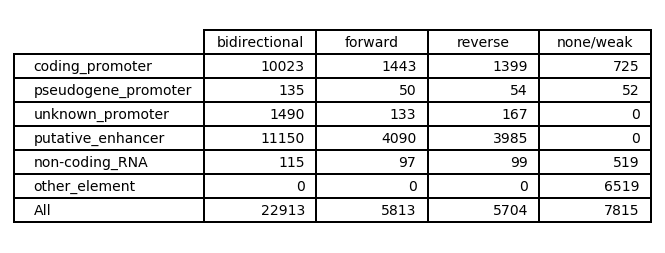

In [38]:
# Short cap bidirectionality statistics
def scap_bidirectionality(mode_count_fwd, mode_count_rev):
    if mode_count_fwd >= 2 and mode_count_rev >= 2:
        return 'bidirectional'
    elif mode_count_fwd >= 2:
        return 'forward'
    elif mode_count_rev >= 2:
        return 'reverse'
    else:
        return 'none/weak'

df_has_scap = pd.DataFrame()
df_has_scap['annot'] = df_regl['annot']
df_has_scap['scap_bidirectionality'] = list(map(scap_bidirectionality, 
    df_prom_fwd['scap_mode_count'], df_prom_rev['scap_mode_count']))
df_has_scap['scap_bidirectionality'].value_counts()

df_ = pd.crosstab(pd.Categorical(df_has_scap['annot']), pd.Categorical(df_has_scap['scap_bidirectionality']),
                 margins=True)\
.loc[config['annot'] + ['All'], ['bidirectional', 'forward', 'reverse', 'none/weak']]

fig = plt.figure(figsize=(4,2))
plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_, ax=plt.gca(), loc='center left')
plt.savefig('annot/FigA_mapping/annot_crosstab_scap.pdf', bbox_inches='tight')

In [39]:
# Strand/stage-specific annotations as .bed-tracks
write_gffbed(vp('regulatory_annotation_fwd.bed'),
        chrom = df_regl['chrom'],
        start = df_regl['start'],
        end = df_regl['end'],
        name = df_regl['promoter_locus_id_fwd'],
        strand = '+',
        itemRgb = list(map(lambda annot: d_annot_strand_legend[annot], df_regl['annot_fwd'])),
        attr = df_prom_fwd[['annot_%s' % (stage,) for stage in config['stages']]],
)

write_gffbed(vp('regulatory_annotation_rev.bed'),
        chrom = df_regl['chrom'],
        start = df_regl['start'],
        end = df_regl['end'],
        name = df_regl['promoter_locus_id_rev'],
        strand = '-',
        itemRgb = list(map(lambda annot: d_annot_strand_legend[annot], df_regl['annot_rev'])),
        attr = df_prom_rev[['annot_%s' % (stage,) for stage in config['stages']]],
)

In [40]:
# Visualise annotation as a single, unstranded .bed-file
def write_regl_bed9(fp_, df_regl_):
    write_gffbed(fp_,
        chrom = df_regl_['chrom'],
        start = df_regl_['start'],
        end = df_regl_['end'],
        name = df_regl_['label'],
        strand = df_regl_['strand'],
        itemRgb = list(map(lambda annot: d_annot_legend[annot], df_regl_['annot'])),
        attr = df_regl_[['annot', 'annot_fwd', 'annot_rev', 'annot_detailed_fwd', 'annot_detailed_rev']],
    )

write_regl_bed9('annot/S2_regulatory_annotation/S2_regulatory_annotation_ce10.bed', df_regl)

In [41]:
# Visualise annotation as a single, unstranded .bed-file (ce11)
def write_regl_bed9(fp_, df_regl_):
    write_gffbed(fp_,
        chrom = df_regl_['chrom_ce11'],
        start = df_regl_['start_ce11'],
        end = df_regl_['end_ce11'],
        name = df_regl_['label'],
        strand = df_regl_['strand'],
        itemRgb = list(map(lambda annot: d_annot_legend[annot], df_regl_['annot'])),
        attr = df_regl_[['annot', 'annot_fwd', 'annot_rev', 'annot_detailed_fwd', 'annot_detailed_rev']],
    )

write_regl_bed9('annot/S2_regulatory_annotation/S2_regulatory_annotation_ce11.bed', df_regl)

In [42]:
# .bed-files of specific types of elements
for annot in config['annot']:
    fp_ = vp('S2_regulatory_annotation.%s_only.bed' % (annot,))
    write_regl_bed9(fp_, df_regl.query('annot == "%s"' % (annot,)).reset_index(drop=True))
    !wc -l {fp_}

13591 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.coding_promoter_only.bed
292 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.pseudogene_promoter_only.bed
1791 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.unknown_promoter_only.bed
19226 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.putative_enhancer_only.bed
831 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.non-coding_RNA_only.bed
6520 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.other_element_only.bed


2118 bidirectional promoters
5786 forward-only promoters
5686 reverse-only promoters


Text(0.970764,-0.517317,'2118 bidirectional\npromoters')

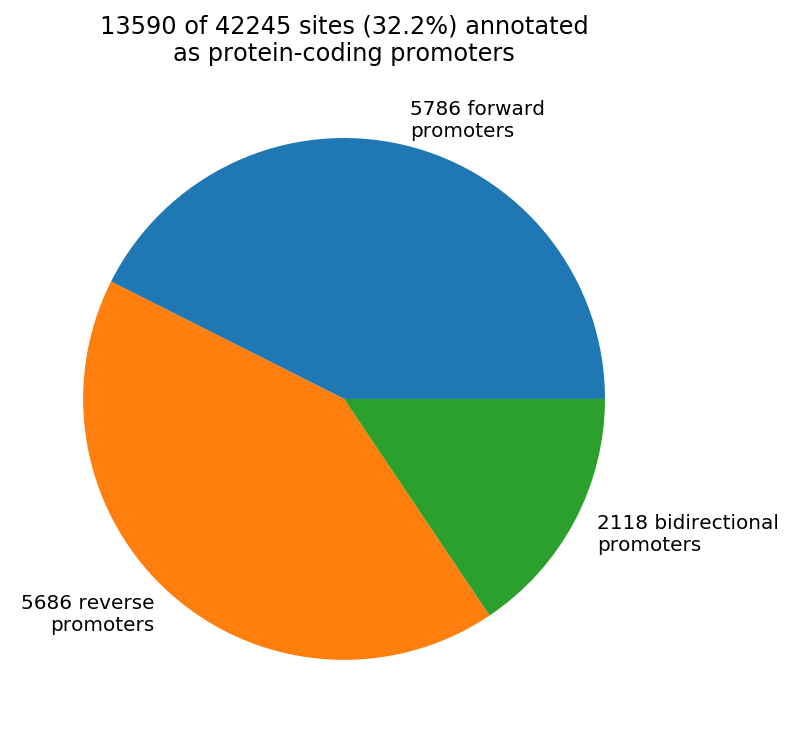

In [43]:
# Visualise number of promoters called
n_bid = len(df_regl.query('(annot == "coding_promoter") & (strand == ".")'))
n_fwd = len(df_regl.query('(annot == "coding_promoter") & (strand == "+")'))
n_rev = len(df_regl.query('(annot == "coding_promoter") & (strand == "-")'))
print('%d bidirectional promoters' % (n_bid))
print('%d forward-only promoters' % (n_fwd,))
print('%d reverse-only promoters' % (n_rev,))
plt.figure(figsize=(16,6)).subplots_adjust(wspace=0.4)
plt.subplot(1,2,1, aspect=1)
plt.title('%d of %d sites (%.1f%%) annotated\nas protein-coding promoters' % \
    (n_fwd + n_rev + n_bid, len(df_regl), 100 * (n_fwd + n_rev + n_bid) / float(len(df_regl)),))
plt.pie([n_fwd, n_rev, n_bid], labels=[
        '%(n_fwd)d forward\npromoters' % locals(),
        '%(n_rev)d reverse\npromoters' % locals(), 
        '%(n_bid)d bidirectional\npromoters' % locals(),
])[-1][-1]